In [1]:
import pandas as pd
import numpy as np 
import datetime
from datetime import datetime, time
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from scipy.sparse.linalg import svds

# Abrindo e analisando o dataset

In [2]:
# header 0, informando que a primeira linha é o nome das colunas e o 
# low_memory, para que todo df seja lido, independente do tipo de cada coluna,
# ou de que na mesma coluna tenha mais de um tipo de dados.

df= pd.read_csv('DF_FINAL.csv', sep = ";", header = 0, low_memory = False)

In [3]:
display(df)

df.info()

print("\n", "Quantidade de valores nulos por coluna: \n\n", df.isnull().sum())

,Time Stamp,Medicao1,Medicao2,Medicao3,Medicao4,Medicao5
0,13:42:16,"-0,0215","-0,344","-0,8579","-0,8112","0,1274"
1,13:42:16,"0,1001","0,1028","-0,3049","-0,8844","0,2127"
2,13:42:16,"-0,0012","0,0783","0,2281","-0,8555","0,4372"
3,13:42:16,"-0,0562","0,7773","0,4201","0,3201","-0,0378"
4,13:42:16,"-0,0547","0,2061","0,9826","0,1338","-0,2223"
...,...,...,...,...,...,...
137016,NaN,NaN,"-1,0982",NaN,NaN,NaN
137017,NaN,NaN,"-0,5078",NaN,NaN,NaN
137018,NaN,NaN,"-0,0639",NaN,NaN,NaN
137019,NaN,NaN,"0,5592",NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137021 entries, 0 to 137020
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Time Stamp  118655 non-null  object
 1   Medicao1    118655 non-null  object
 2   Medicao2    137021 non-null  object
 3   Medicao3    135190 non-null  object
 4   Medicao4    127761 non-null  object
 5   Medicao5    122571 non-null  object
dtypes: object(6)
memory usage: 6.3+ MB

 Quantidade de valores nulos por coluna: 

 Time Stamp    18366
Medicao1      18366
Medicao2          0
Medicao3       1831
Medicao4       9260
Medicao5      14450
dtype: int64


In [4]:
# Realizando a exclusão dos dados faltantes, com axis = 0 para 
# identificar que a exclusão deve ocorrer nas linhas.

df= df.dropna(axis = 0)

In [5]:
# Passando em cada uma das colunas e alterando o separador, 
# desta forma os dados de medição serão transformados no tip float.

columns_= df.columns

for column in columns_:
    if column != 'Time Stamp':
        df[column] = df[column].str.replace(',', '.').astype(float)

# Transformada a coluna Time Stamp em datetime e após crio uma columa time, pegando o valor original e 
# # transformando em segundos, outra alternativa seria separar a coluna em 3, hora, minuto e segundo, o que 
# iria aumentar a quantidade de dimensões.

df['Time Stamp'] = pd.to_datetime(df['Time Stamp'])

df['time'] = df['Time Stamp'].apply(lambda x: x.hour*3600 + x.minute*60 + x.second)

#  Por fim ajusto o index e excluo as colunas que não serão mais úteis.

df = df.reset_index()

df = df.drop(['Time Stamp', 'index'], axis=1)

In [6]:
# Normalizando os dados, coluna a coluna, dividindo cada dado pelo maior valor de sua coluna.

columns_= df.columns

for column in columns_:
        df[column] = df[column] / df[column].max()

In [7]:
display(df)

df.info()

print("\n", "Quantidade de valores nulos por coluna: \n\n", df.isnull().sum())

display(df.describe())

,Medicao1,Medicao2,Medicao3,Medicao4,Medicao5,time
0,-0.037699,-0.167969,-0.478766,-0.510060,0.062207,0.994597
1,0.175522,0.050195,-0.170155,-0.556087,0.103857,0.994597
2,-0.002104,0.038232,0.127295,-0.537915,0.213477,0.994597
3,-0.098545,0.379541,0.234444,0.201270,-0.018457,0.994597
4,-0.095914,0.100635,0.548356,0.084130,-0.108545,0.994597
...,...,...,...,...,...,...
118650,-0.042083,-0.552148,0.178805,0.435551,0.037109,1.000000
118651,0.058916,0.518213,0.335566,0.295900,0.204346,1.000000
118652,-0.126425,0.093701,0.071935,-0.372674,0.039746,1.000000
118653,-0.287393,-0.248340,-0.153692,-0.227176,-0.043506,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118655 entries, 0 to 118654
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Medicao1  118655 non-null  float64
 1   Medicao2  118655 non-null  float64
 2   Medicao3  118655 non-null  float64
 3   Medicao4  118655 non-null  float64
 4   Medicao5  118655 non-null  float64
 5   time      118655 non-null  float64
dtypes: float64(6)
memory usage: 5.4 MB

 Quantidade de valores nulos por coluna: 

 Medicao1    0
Medicao2    0
Medicao3    0
Medicao4    0
Medicao5    0
time        0
dtype: int64


,Medicao1,Medicao2,Medicao3,Medicao4,Medicao5,time
count,118655.000000,118655.000000,118655.000000,118655.000000,118655.000000,118655.000000
mean,-0.058138,-0.024464,-0.028002,-0.047268,-0.041152,0.997298
std,0.134420,0.327572,0.263206,0.322850,0.385851,0.001558
min,-0.911450,-1.000000,-1.021039,-1.287726,-1.000000,0.994597
25%,-0.150096,-0.277100,-0.214995,-0.290933,-0.253613,0.995948
50%,-0.063475,-0.021045,-0.017858,-0.033136,-0.004492,0.997299
75%,0.027179,0.222510,0.157375,0.198001,0.186230,0.998649
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
# Plotagem dos gráficos, coluna a coluna, afim de identificar outliers.

# Analisando, identifiquei que existem poucos outliers,sua exlusão não altera o resultado final da clusterização.

# Devido a quantidade de dados, os gráficos levam bastante tempo para serem plotados,
# so descomente esse código se tiver bom poder computacional.

# for column in columns_:
#     fig= px.violin(df, y= column, box= True, points= 'all')
#     fig.show()

In [9]:
# Convertendo os dados em array numpy

x= np.array(df)

In [10]:
# Devido a quantidade de dimensões e dados, e após varios testes com o DF original,
# tendo resultados ruins na clusterização, vi a necessidade de utilizar algo
# para reduzir a quantidade de dimensões sem modificar manualmente os dados. 
# Para isso utilizei a função svds da biblioteca SciPy, aplicando a Decomposição em valores singulares (SVD).

# Depois de alguns testes manuais, identifiquei que 2 componentes trazia o melhor 
# resultado de decomposição ao aplicar os dados resultantes na clusterização.

num_components= 2

u, s, v = svds(x, k = num_components)

In [11]:
print(f"Shape de u: {u.shape}\nShape de v: {v.shape}")

Shape de u: (118655, 2)
Shape de v: (2, 6)


In [12]:
# Utilizei a Matriz u para realizar os testes de quantidade de clusters ideias e treinamento do algoritmo.

x= u

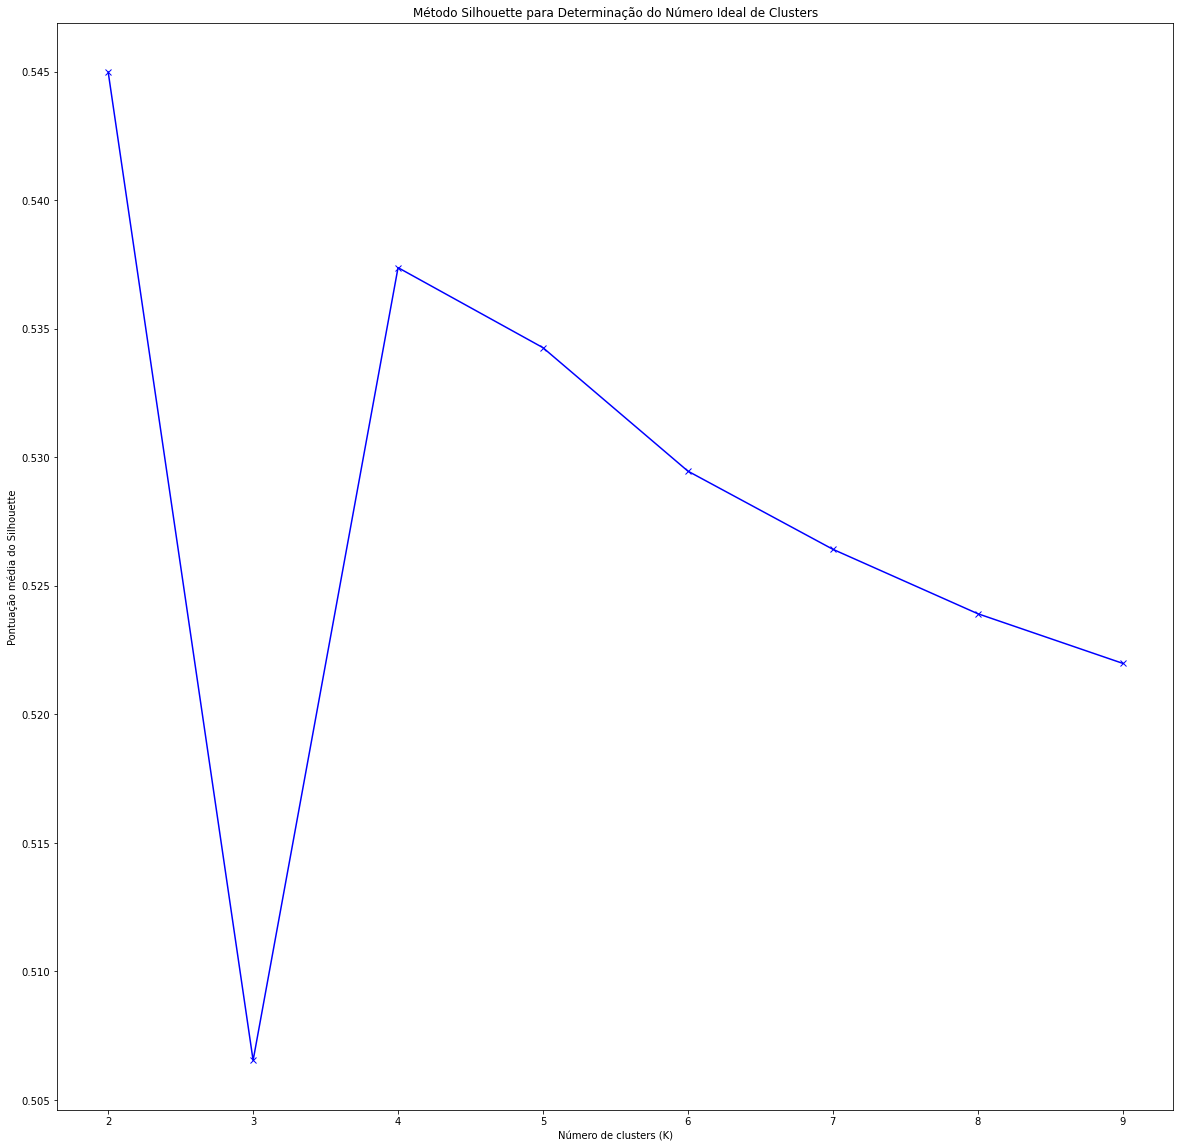

O número ideal de clusters é: 2


In [13]:
# Realizado n clusterizações, e armazenando os dados de pontuação de silhouette,
# após plotagem do gráfico demosntrando o resultado para cada quantidade de clusters e por 
# fim aplicado relizado calculo e exibido número ideal de clusters com a maior pontuação média do silhouette.

silhouette_scores= []
clusters_ = range(2, 10)

for k in clusters_:
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(x)
    silhouette_scores.append(silhouette_score(x, kmeans.labels_))

plt.figure(figsize = (20, 20))
plt.plot(clusters_, silhouette_scores, 'bx-')
plt.xlabel('Número de clusters (K)')
plt.ylabel('Pontuação média do Silhouette')
plt.title('Método Silhouette para Determinação do Número Ideal de Clusters')
plt.show()

ideal_cluster_s = np.argmax(silhouette_scores) + 2
print(f"O número ideal de clusters é: {ideal_cluster_s}")

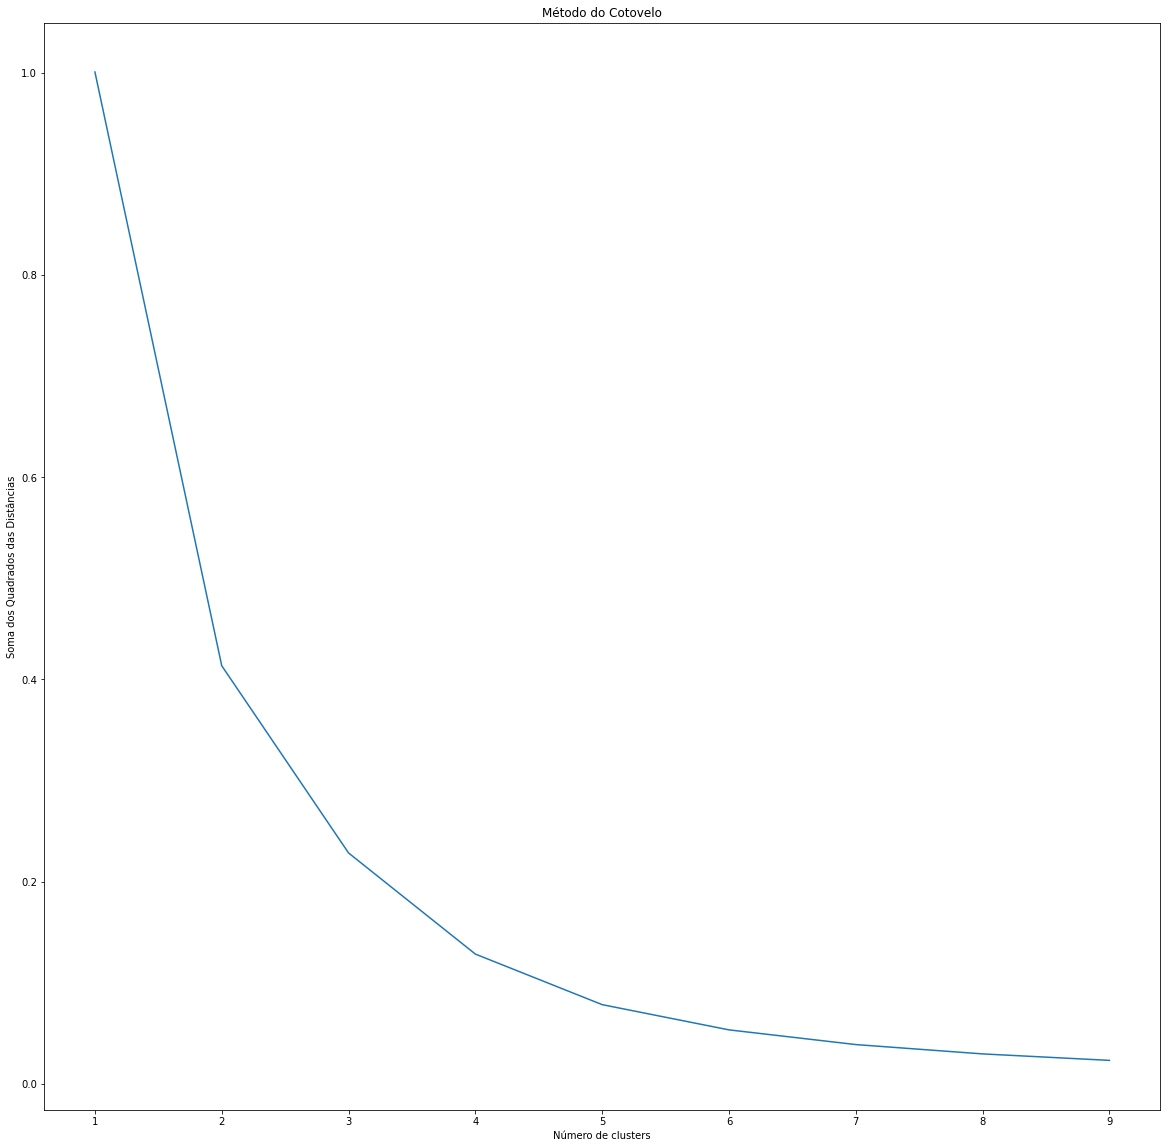

O número ideal de clusters é: 2


In [14]:
# Aplicado n testes e armazenados os dados de inertia_ na lista sse, plotagem de gráfico e exibição de valor ideal 
# de clusters com base no método cotovelo 

sse= []

for k in range(1, 10):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(x)
    sse.append(kmeans.inertia_)

plt.figure(figsize = (20, 20))
plt.plot(range(1, 10), sse)
plt.title('Método do Cotovelo')
plt.xlabel('Número de clusters')
plt.ylabel('Soma dos Quadrados das Distâncias')
plt.show()

ideal_cluster_c = np.argmax(sse) + 2
print(f"O número ideal de clusters é: {ideal_cluster_c}")

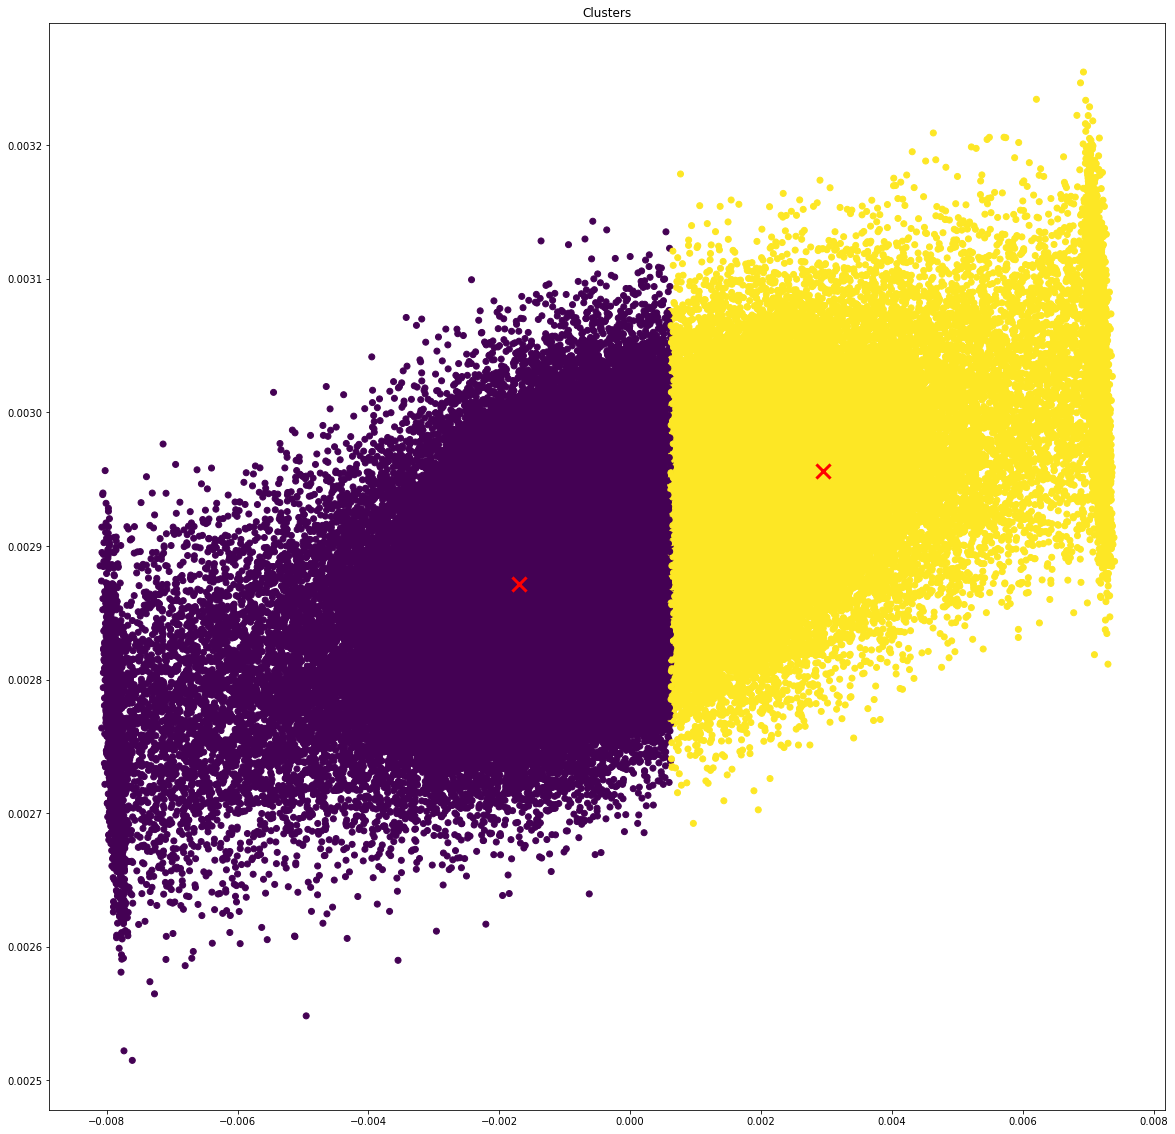

In [15]:
# Valor ideal de clusters, em ambos metodos, foi 2. 

# Aplicado algoritmo de clusterização e plotado gráfico de dispersão, sinalizando e demonstrando os centroides.

kmeans= KMeans(n_clusters = 2)
kmeans.fit(x)

plt.figure(figsize = (20, 20))
plt.scatter(x[:, 0], x[:, 1], c = kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker = 'x', s = 200, linewidths = 3, color = 'r')
plt.title('Clusters')
plt.show()